## Problem Statement:
#### To predict the diabetes patient readmission into the hospital

### Introduction about the features:
- **Encounter Id** - Unique identifier of an encounter
- **patient number** - Unique identifier of a patient
- **Race** - Values: Caucasian, Asian, African, American, Hispanic and Other
- **Gender** - Male, Female, Unknown/Invalid
- **Age** - Grouper in 10 year Intervals : [0,10), [10, 20),..
- **Weight** - Weight in pounds
- **Admission type** - Integer identifier corresponding to 9 distinct values for example emergency, new born, elective and not available
- **Discharge disposition** - Integer identifier corresponding to 29 distinct values for example discharged to home, expired and not available
- **Admission source** - Integer identifier corresponding to 21 distinct values for exmaple physician referral, emergency room and transfer from a hospital
- **Time in hospital** - Integer number of days between admission and discharge
- **Payer code** - Integer identifier corresponding to 23 distinct values fro example BluwCross, MediCare and self-pay
- **Medical specialty** - values for example cardiology, internal medicine, family\general practice and surgeon
- **Number of lab procedures** - Number of lab tests performed during the encounter
- **Number of procedures** - Number of procedures (other than lab tests) performed during the encounter
- **Number of medications** - Number of distinct generic names administered during the encounter
- **Number of outpatient vists** - Number of outpatient visits of the patient in the year preceding the encounter
- **number_emergency** - Number of emergency visits of the patient in the year preceding the encounter
- **number_inpatient** - Number of inpatient visits of the patient in the year preceding the encounter
- **diag_1** - Primary diagnosis (coded as first 3 digits of ICD9); 848 distinct values
- **diag_2** - Secondary diagnosis (coded as first 3 digits of ICD9); 923 distinct values
- **diag_3** - Additional Secondary diagnosis (coded as first 3 digits of ICD9); 954 distinct values
- **number_diagnoses** - Number of diagnoses entered to the system
- **Glucose serum test result** - Indicates range of the result or if the test was not taken. Values:">200", ">300", "normal", and "none" if not measured
- **A1Cresult** -  Indicates range of the result or if the test was not taken. Values: ">8" if the result was greater than 8%, ">7" if result greater than 7 and less than 8, "normal" if result less than 7, and "none" if not measured
- **Change of medications** - Indicates if there was a change in diabetic medications (either dosage or generic name). values:  "change" and "no change"
- **Diabetes medications** - Indicates if there was any diabetic medication prescribed. Values: "yes" or "no"      
- **24 features for medications** - 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone', 'metformin- rosiglitazone', 'metformin-pioglitazone', 'change','diabetesMed', 
- **Readmitted** - 30 days, >30days, <30 days

#### Importing Necessary Libraries 

In [794]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Data

In [795]:
df = pd.read_csv('diabetic-patients-readmission-prediction/diabetic_data.csv')

In [796]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Pre-Processing (or) Data Wrangling

In [797]:
df.shape

(101766, 50)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Dropping the Encounter_Id, Patient_Id as they are statistically insignificant

In [800]:
df.drop(labels=['encounter_id','patient_nbr'],axis=1, inplace=True)

### Checking for missing values

In [801]:
df.isnull().sum()

race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

#### Null values found in two columns max_glu_serum, A1Cresult

In [803]:
percent = ((df['max_glu_serum'].count())/df.shape[0])*100
print(percent)

5.253227993632451


#### Dropping the "Max_glu serum" column since majority are missing values over 95%

In [804]:
df.drop(labels=['max_glu_serum'],axis=1, inplace=True)

In [805]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Checking for Duplicate records

In [808]:
df.duplicated().sum()

0

#### No duplicate records found

--------------------------------------------------------------------------------------------------------------------------------
### Descriptive Statistics

In [816]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


In [826]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'There are {len(categorical_features)} Categorical Features:     {categorical_features}')
print(f'\nThere are {len(numerical_features)} Numerical Features:     {numerical_features}')

There are 35 Categorical Features:     ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

There are 11 Numerical Features:     ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


#### Categorical Columns description

In [817]:
df[categorical_features].describe().T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
A1Cresult,17018,3,>8,8216


### Checking all unique values in the Dataset

In [818]:
df.nunique()

race                          6
gender                        3
age                          10
weight                       10
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
payer_code                   18
medical_specialty            73
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_1                      717
diag_2                      749
diag_3                      790
number_diagnoses             16
A1Cresult                     3
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglit

In [820]:
df['weight'].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [824]:
percent = (98569/df.shape[0])*100
print(percent)

96.85847925633315


#### Dropping the Weight column since 96% of the data is having invalid value '?'

In [825]:
df.drop('weight', axis=1, inplace=True)

#### Dropping the payer_code and medical_specialty Since they have too many invalid values "?"

In [884]:
df.drop(labels = ['payer_code', 'medical_specialty'], axis=1, inplace=True)

### Univariate Analysis

'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'

#### Starting univariate analysis for Numerical features

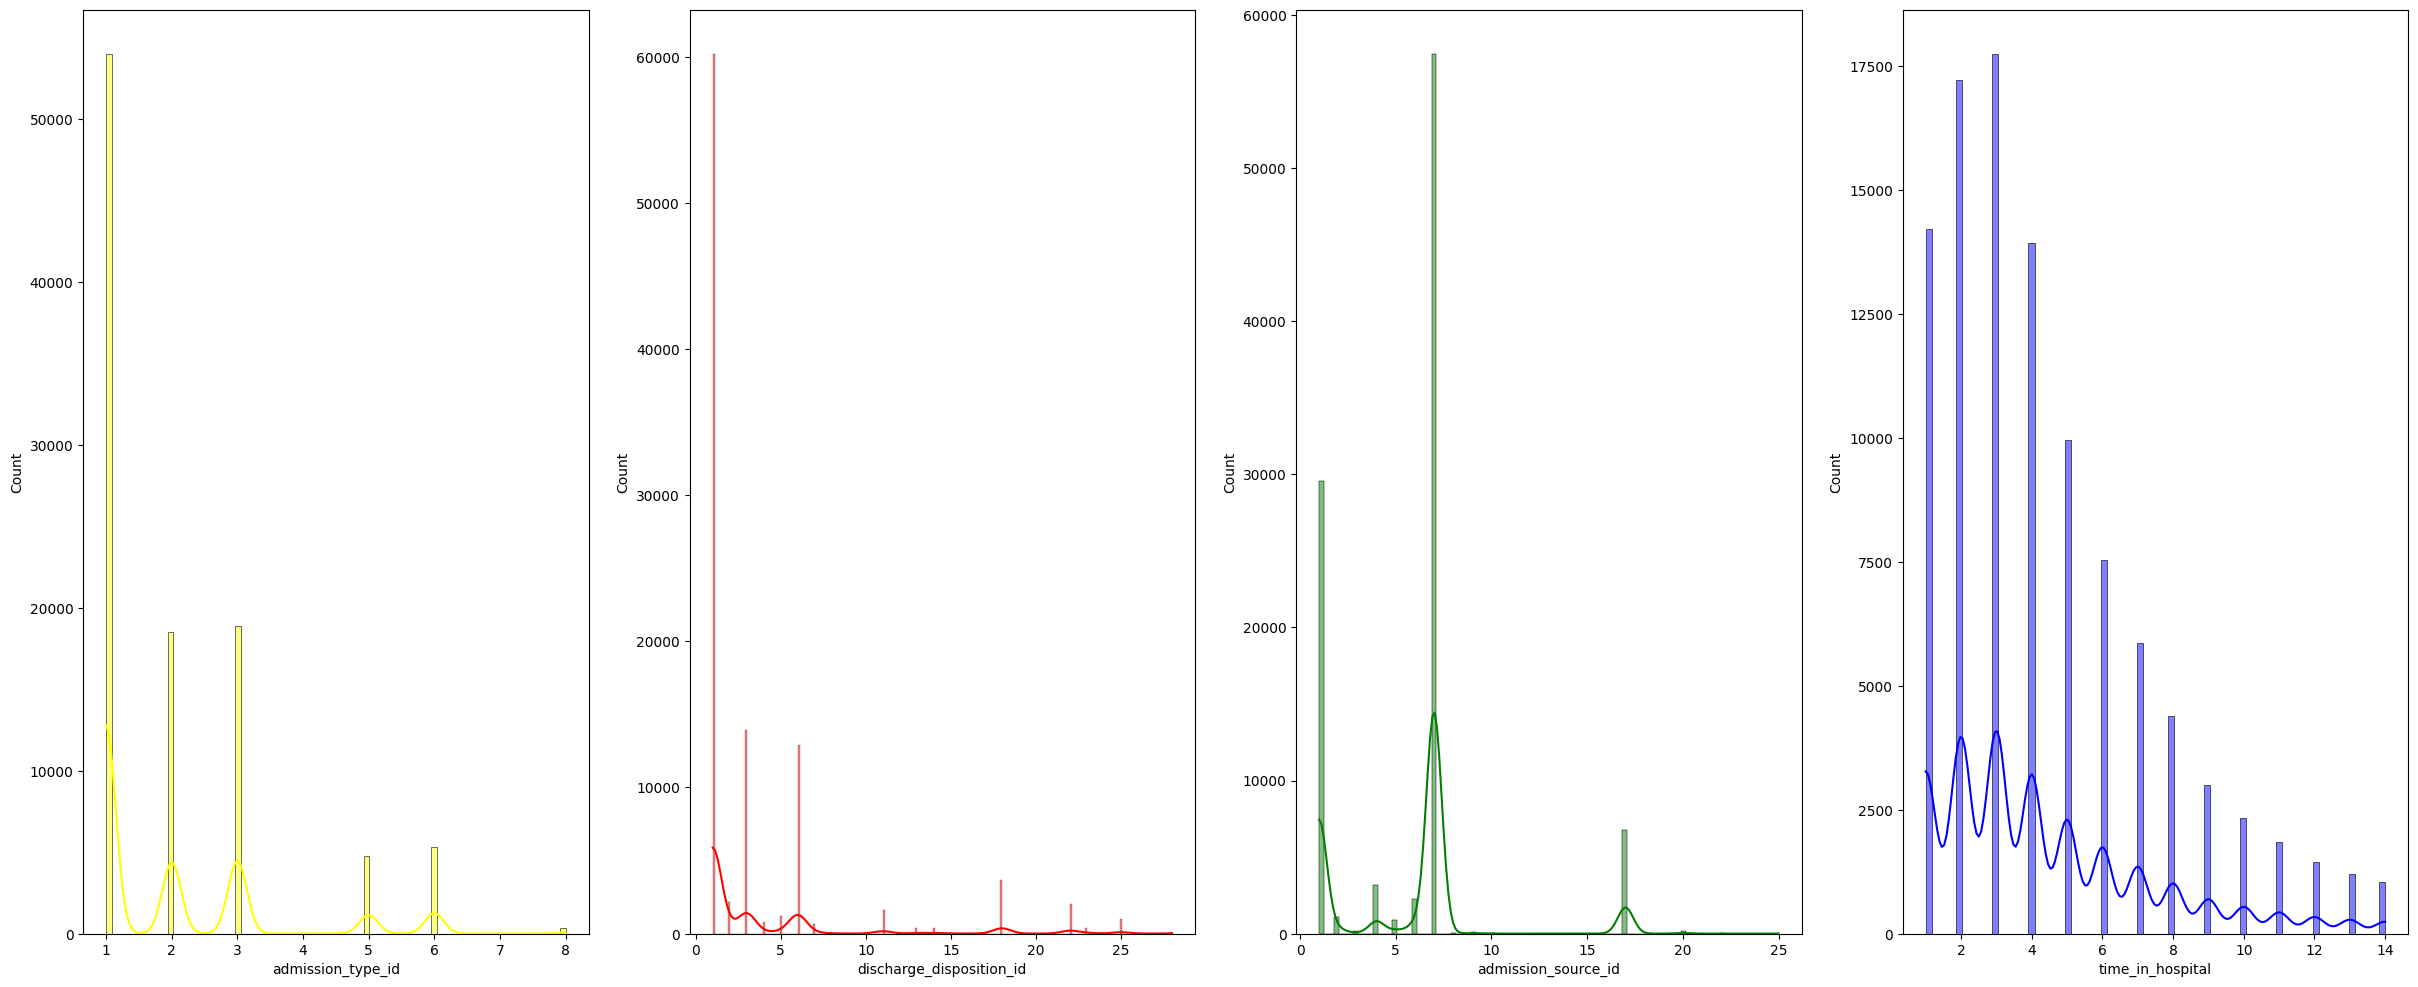

In [830]:
fig, axs = plt.subplots(1, 4, figsize=(30,12))

plt.subplot(141)
sns.histplot(data=df, x='admission_type_id',kde=True, color='yellow')

plt.subplot(142)
sns.histplot(data=df,x='discharge_disposition_id',kde=True, color='red')

plt.subplot(143)
sns.histplot(data=df,x='admission_source_id',kde=True, color='green')

plt.subplot(144)
sns.histplot(data=df,x='time_in_hospital',kde=True, color='blue')
plt.show()

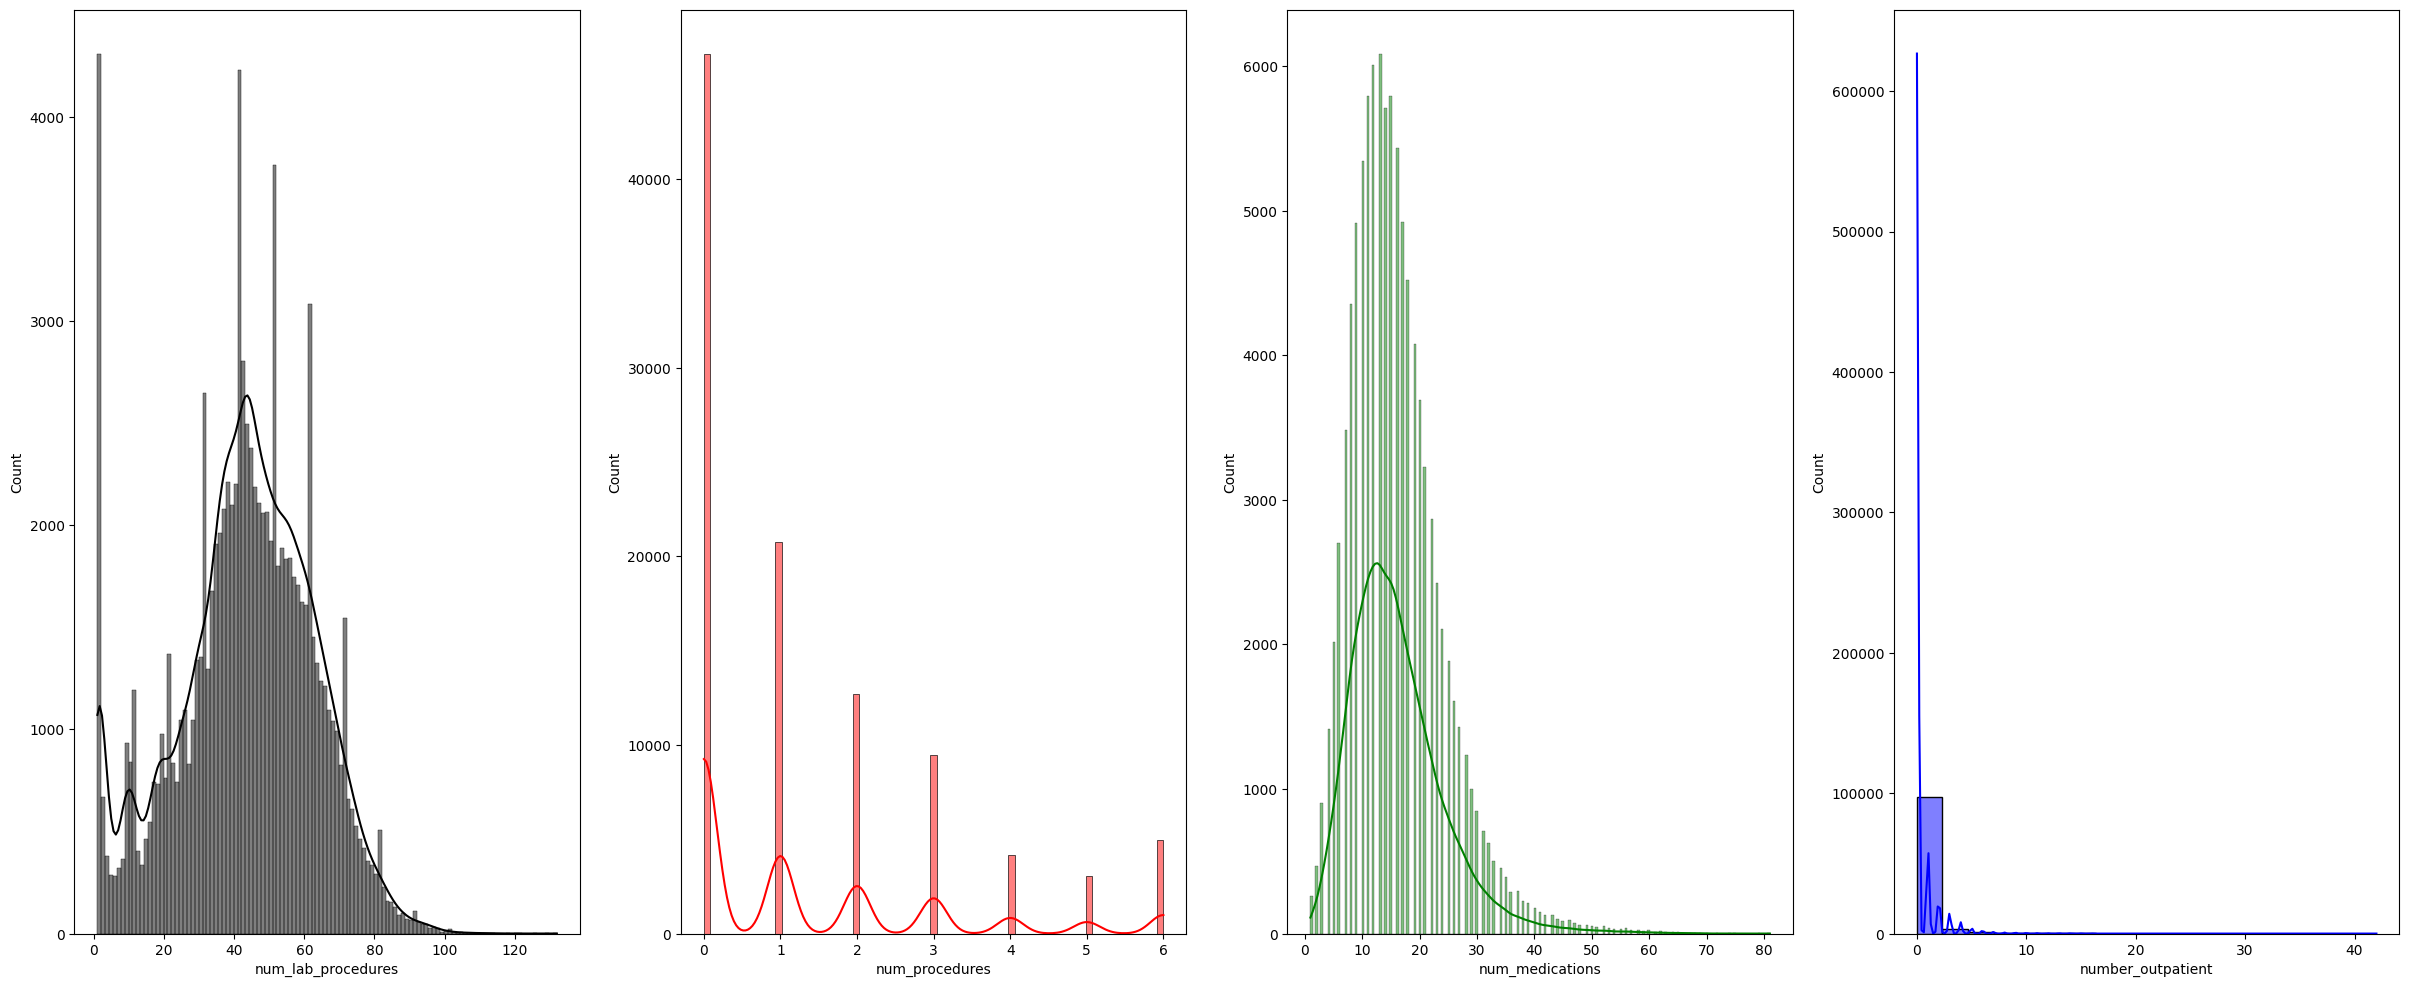

In [831]:
fig, axs = plt.subplots(1, 4, figsize=(30,12))

plt.subplot(141)
sns.histplot(data=df, x='num_lab_procedures',kde=True, color='black')

plt.subplot(142)
sns.histplot(data=df,x='num_procedures',kde=True, color='red')

plt.subplot(143)
sns.histplot(data=df,x='num_medications',kde=True, color='green')

plt.subplot(144)
sns.histplot(data=df,x='number_outpatient',kde=True, color='blue')
plt.show()

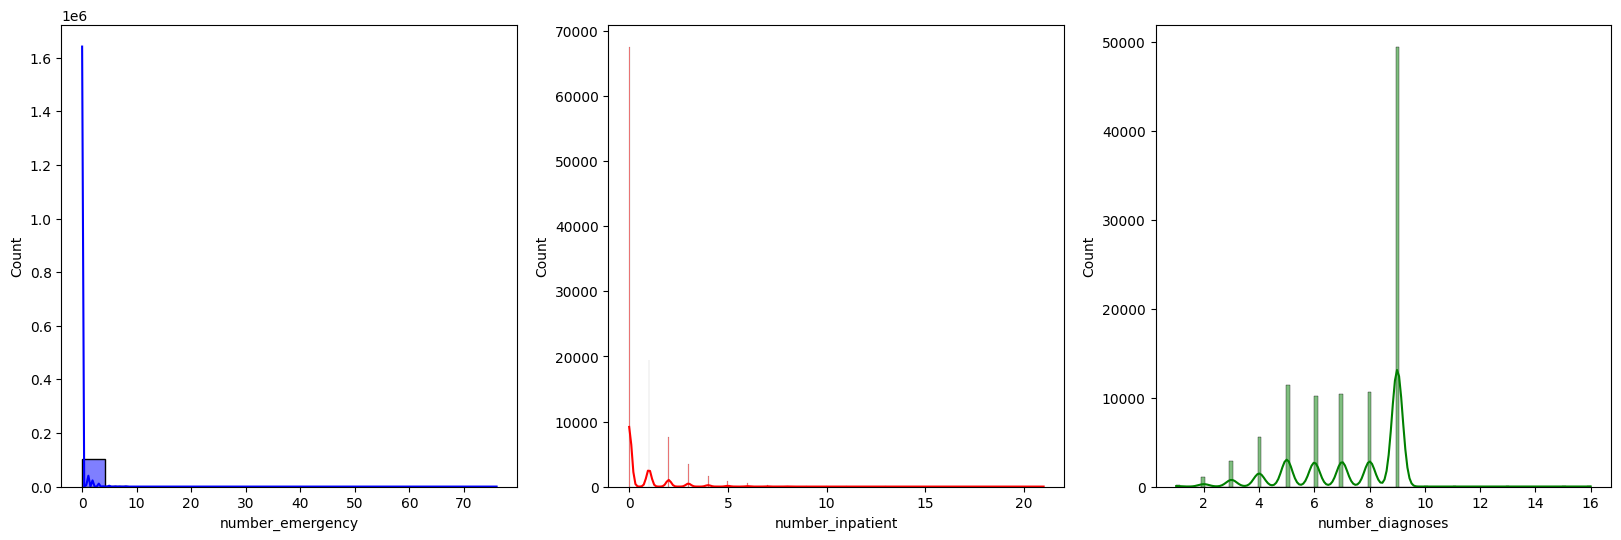

In [834]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))

plt.subplot(131)
sns.histplot(data=df, x='number_emergency',kde=True, color='blue')

plt.subplot(132)
sns.histplot(data=df,x='number_inpatient',kde=True, color='red')

plt.subplot(133)
sns.histplot(data=df,x='number_diagnoses',kde=True, color='green')

plt.show()

#### Starting Univariate analysis for Categorical features
'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'

In [ ]:
categorical_features.remove('payer_code')

In [892]:
categorical_features.remove('medical_specialty')

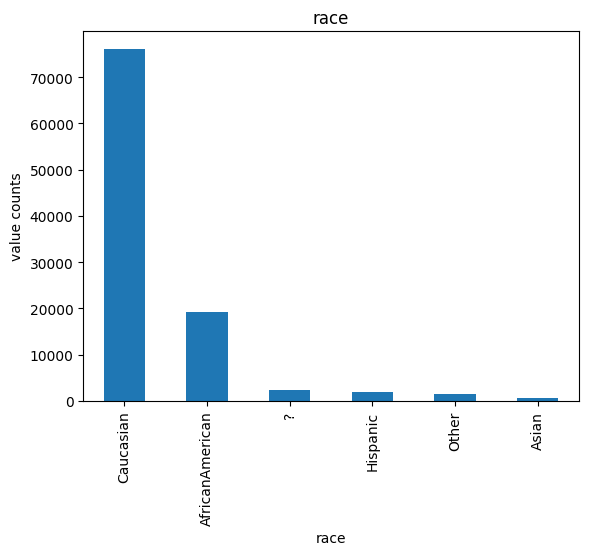

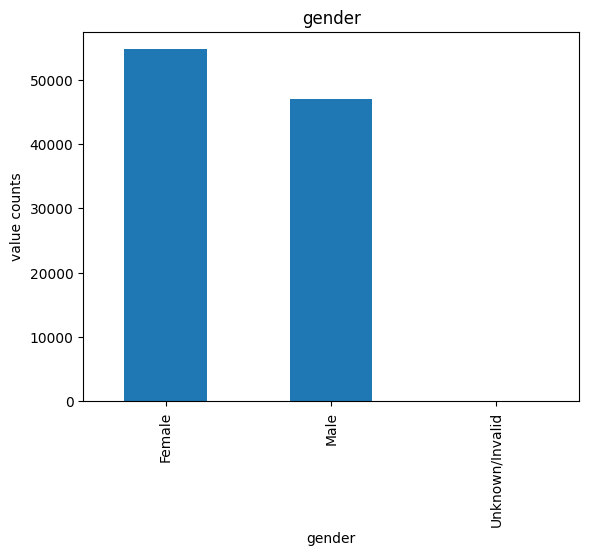

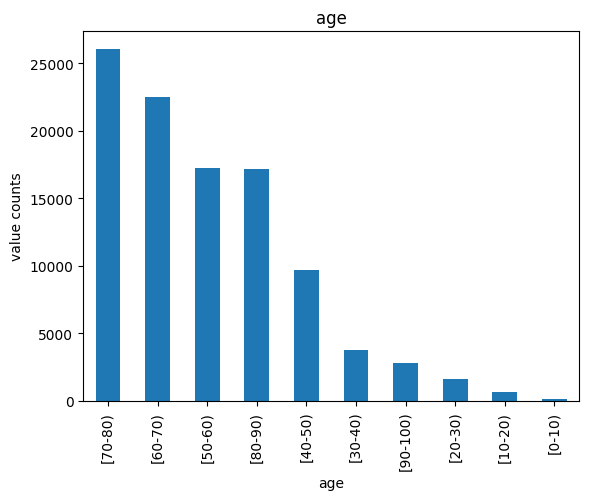

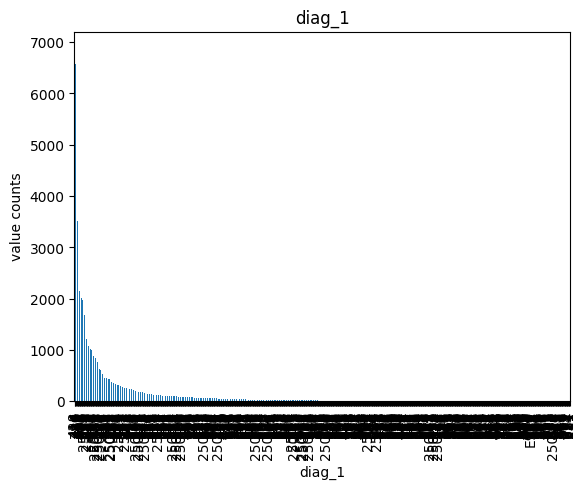

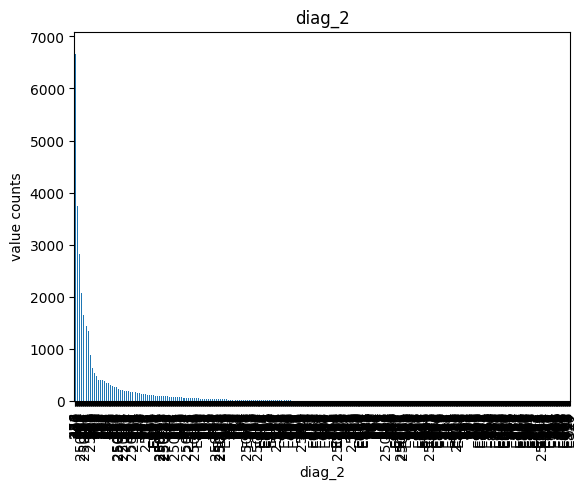

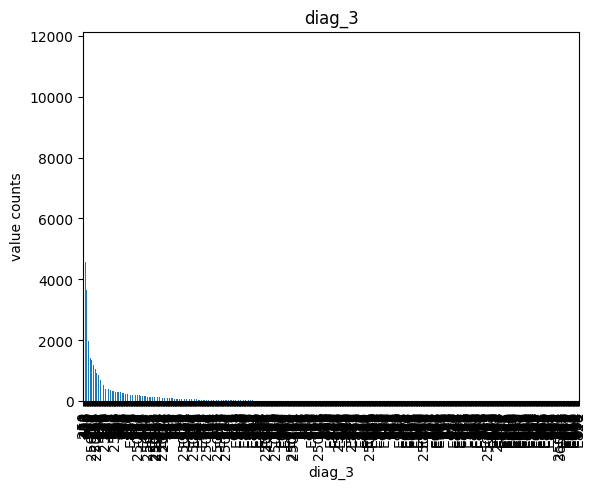

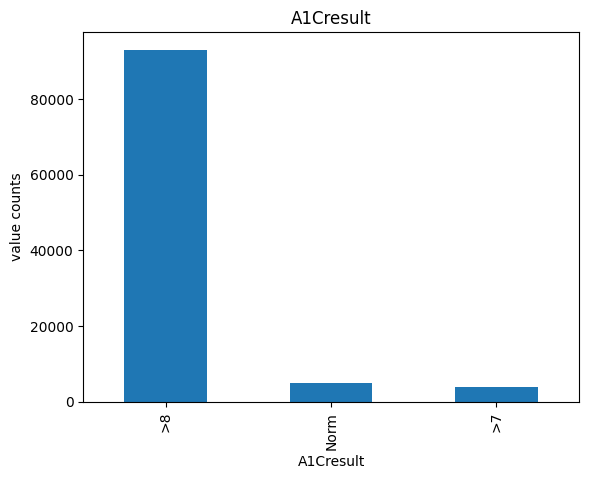

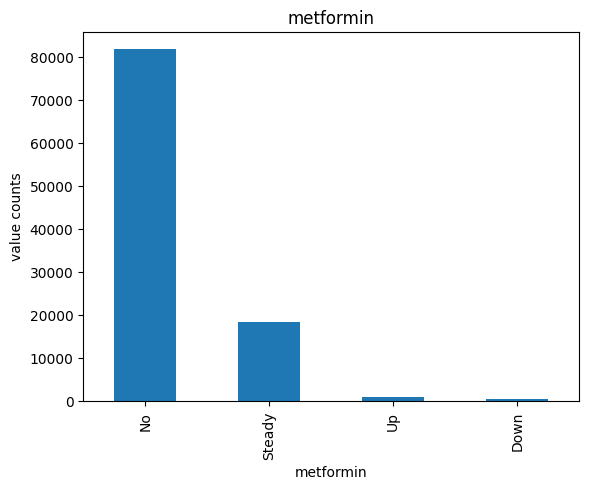

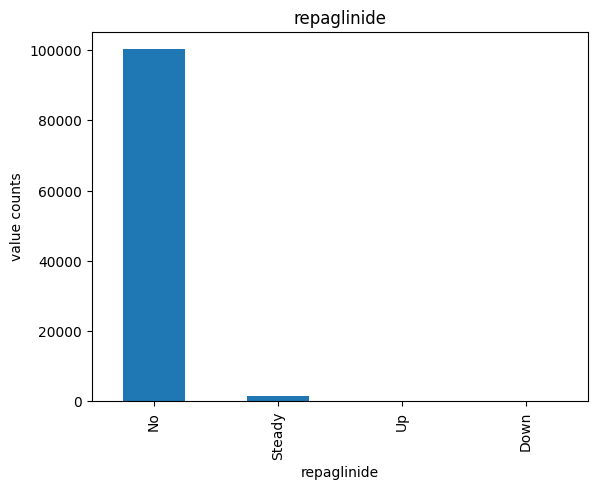

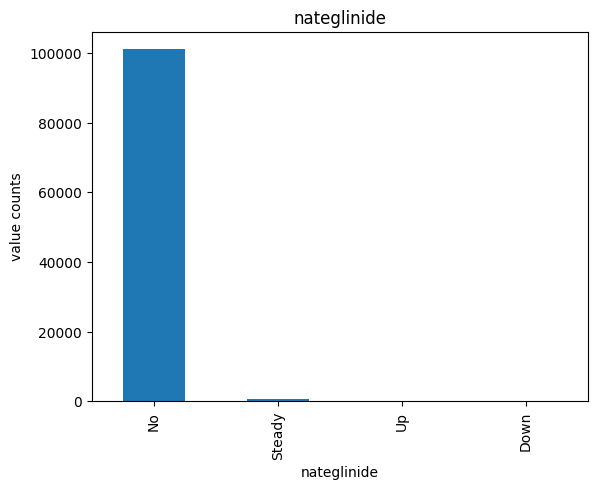

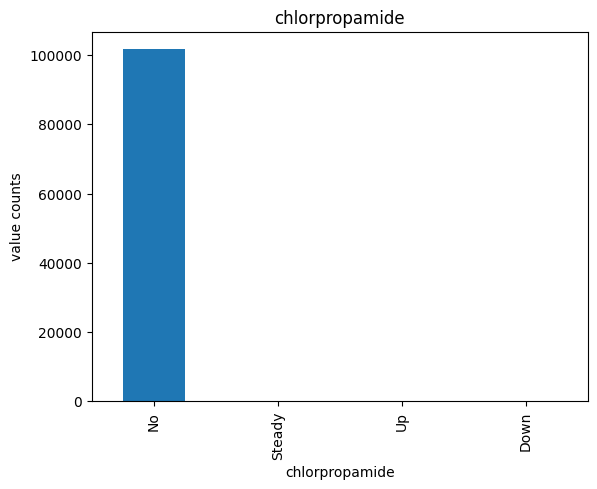

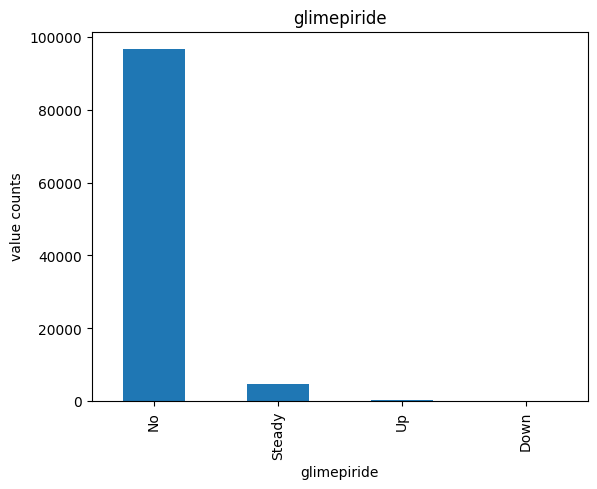

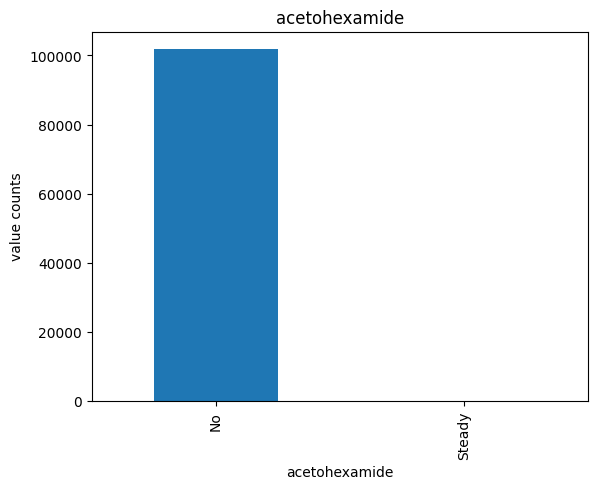

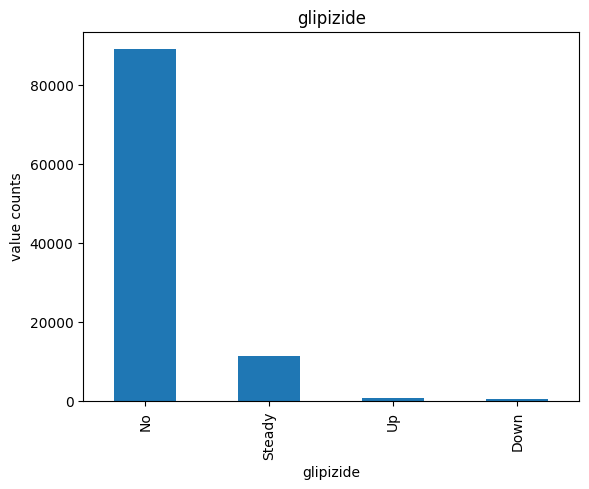

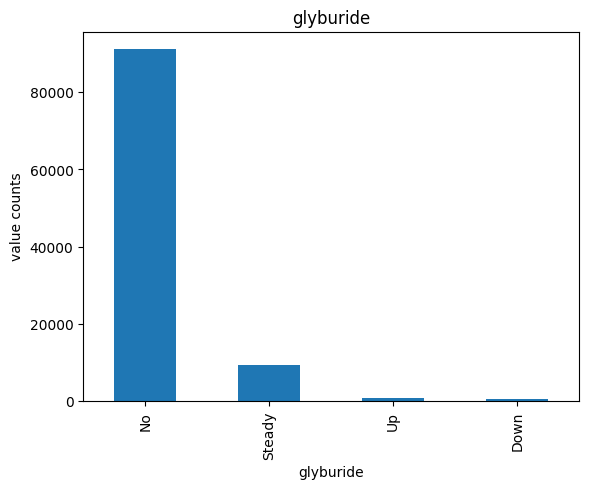

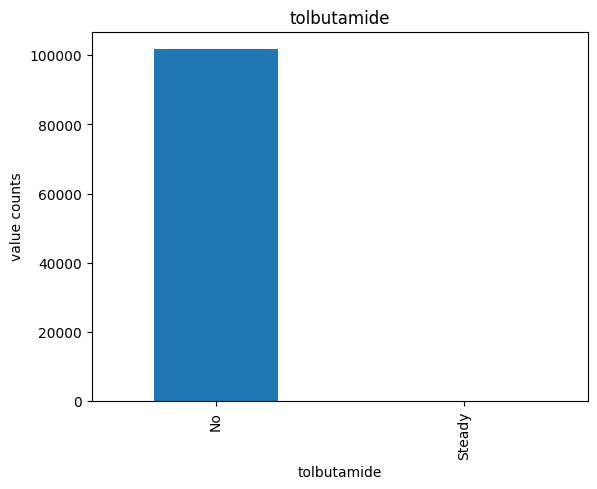

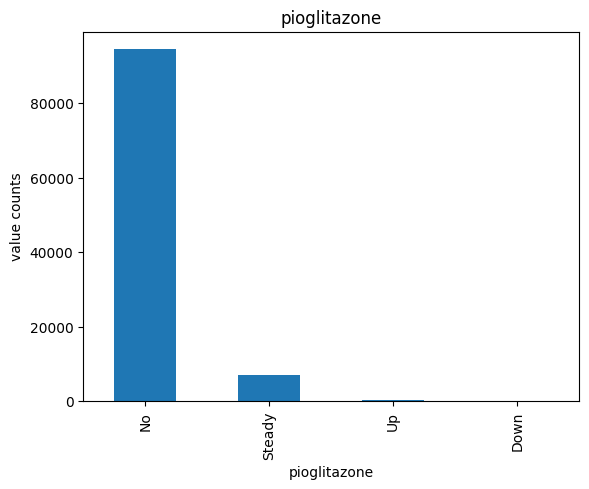

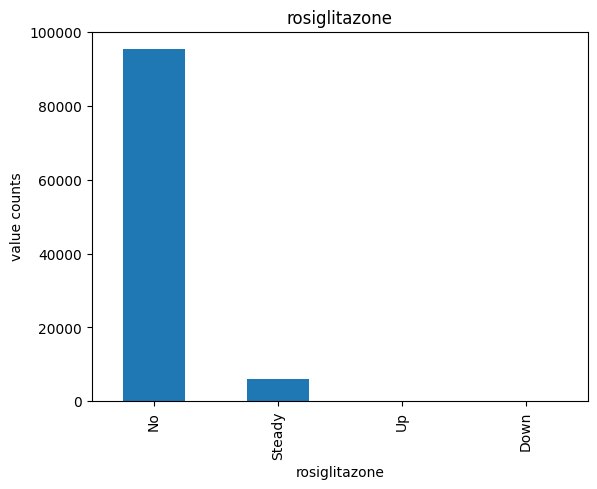

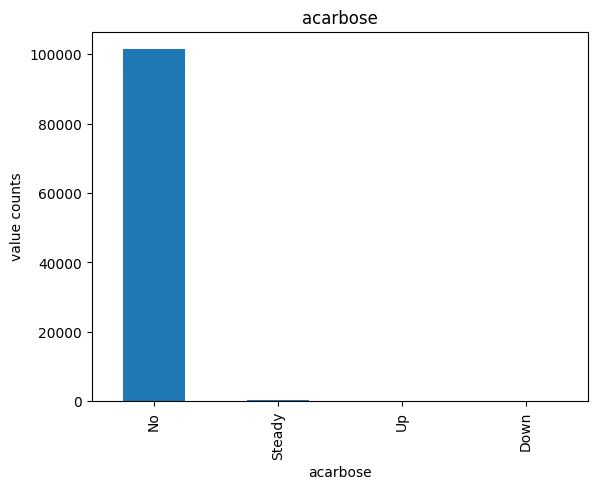

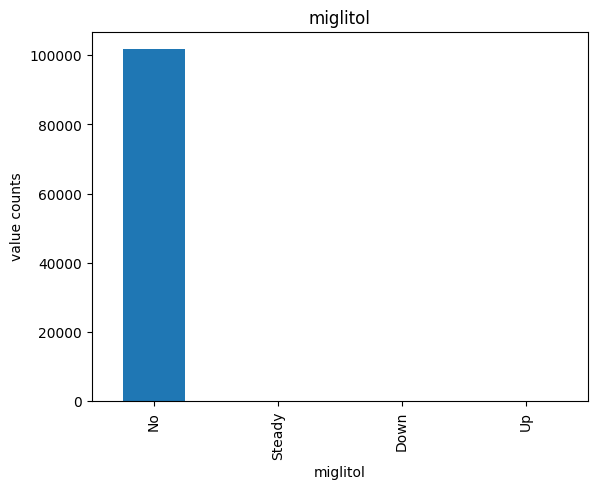

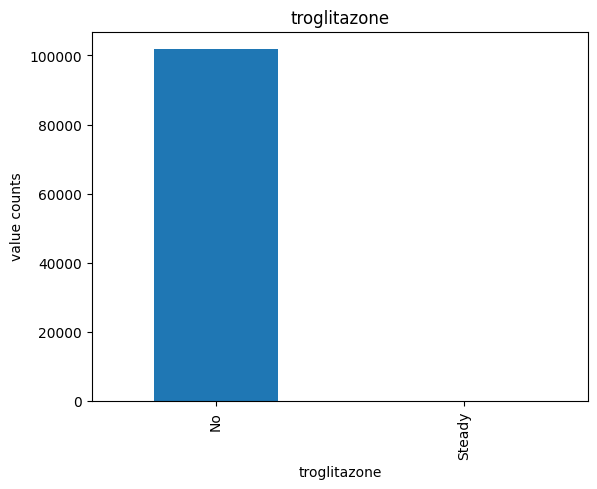

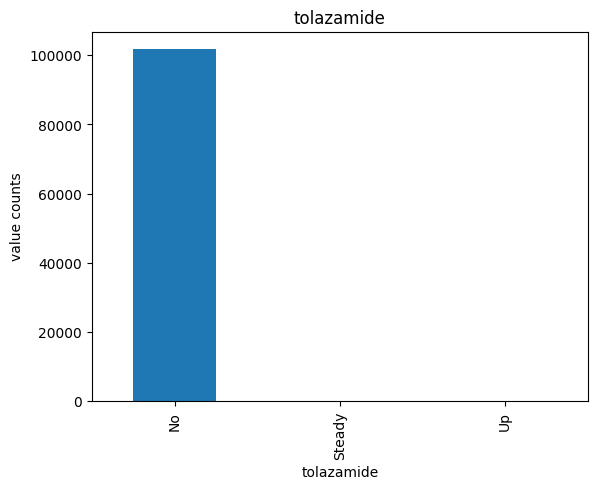

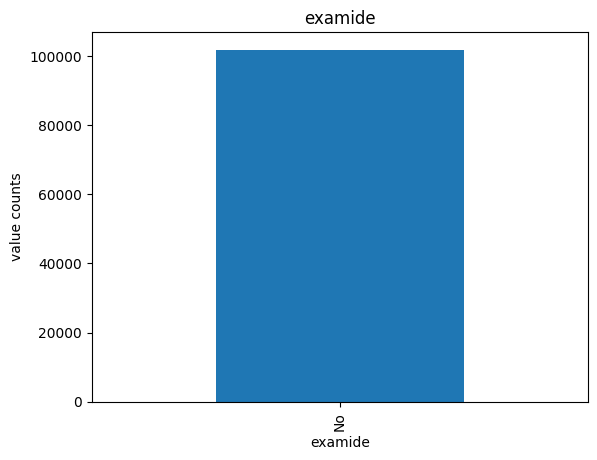

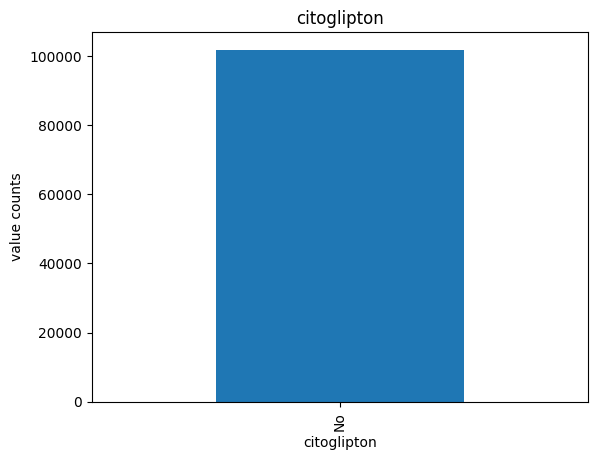

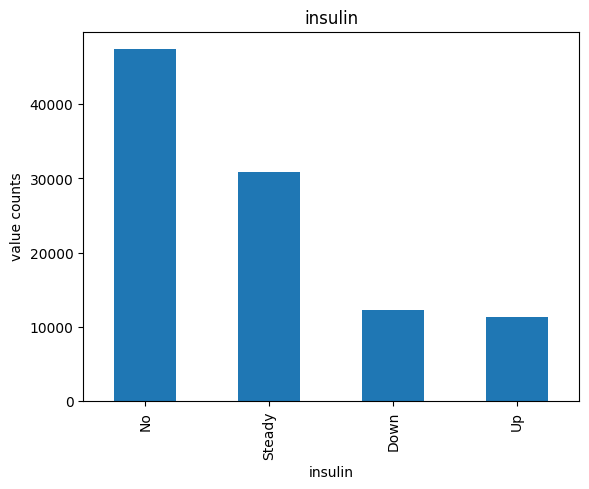

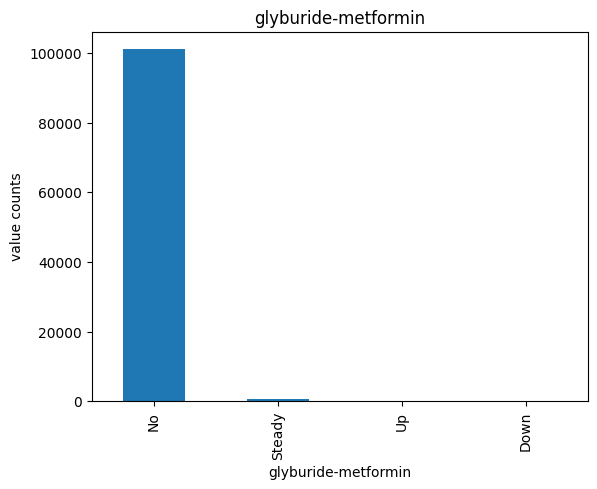

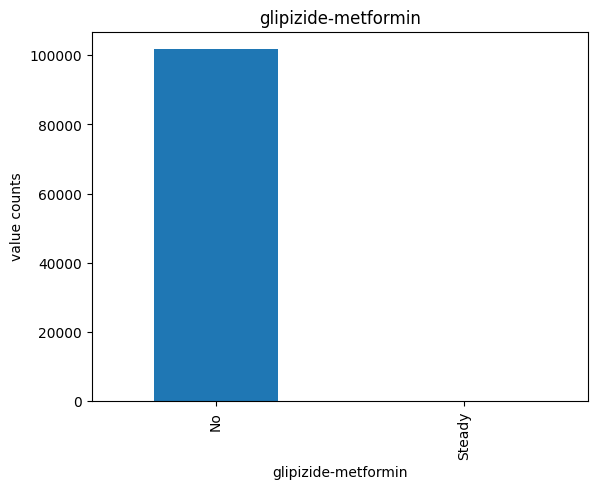

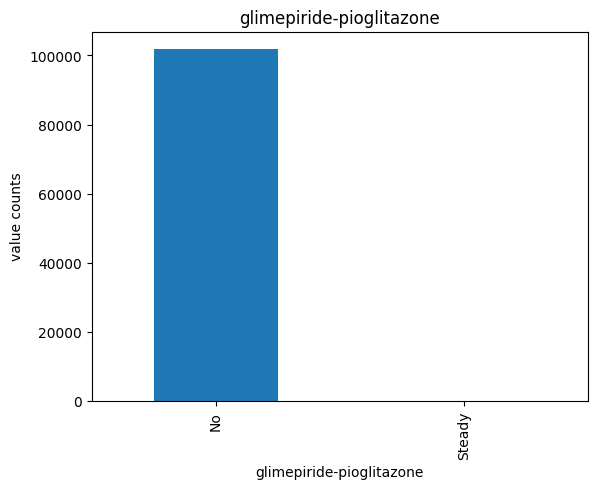

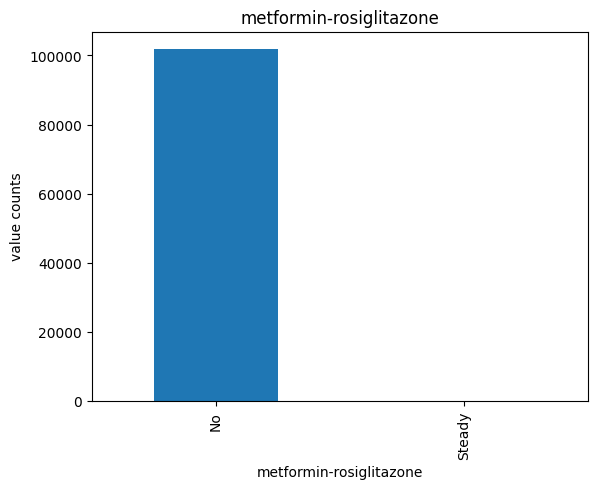

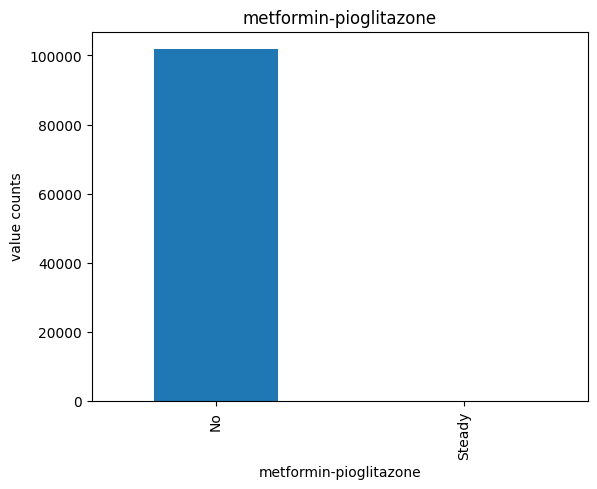

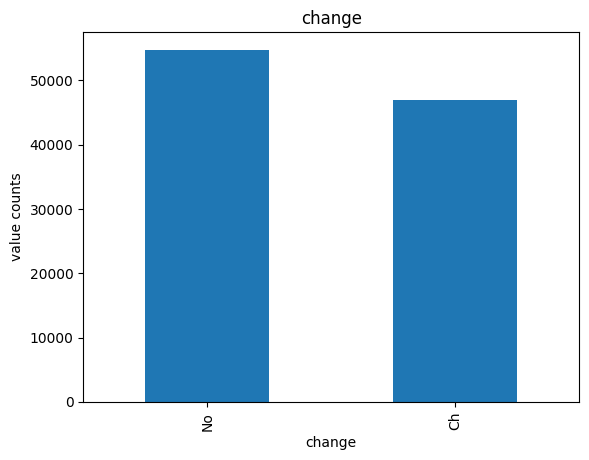

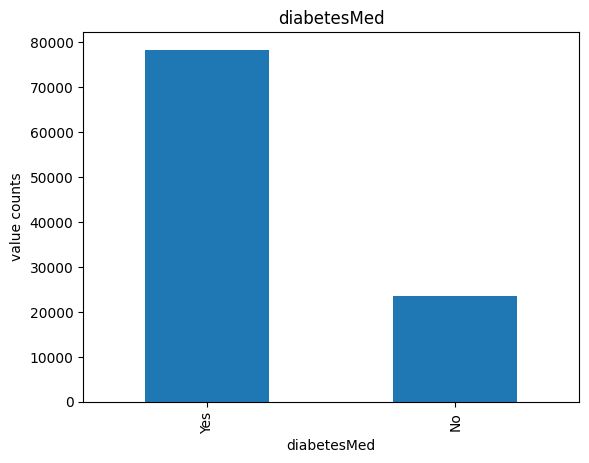

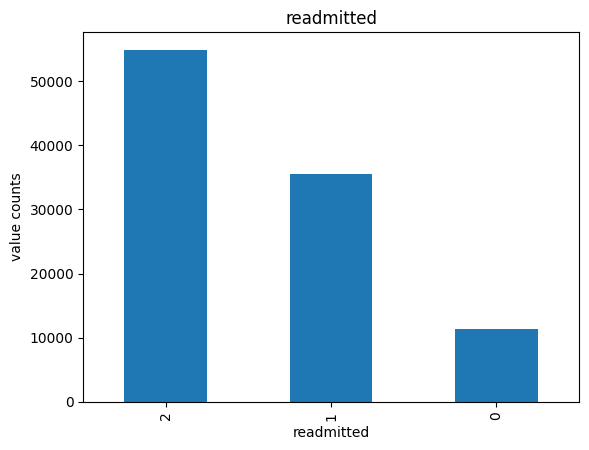

In [893]:
for i in categorical_features:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

### Bivariate Analysis

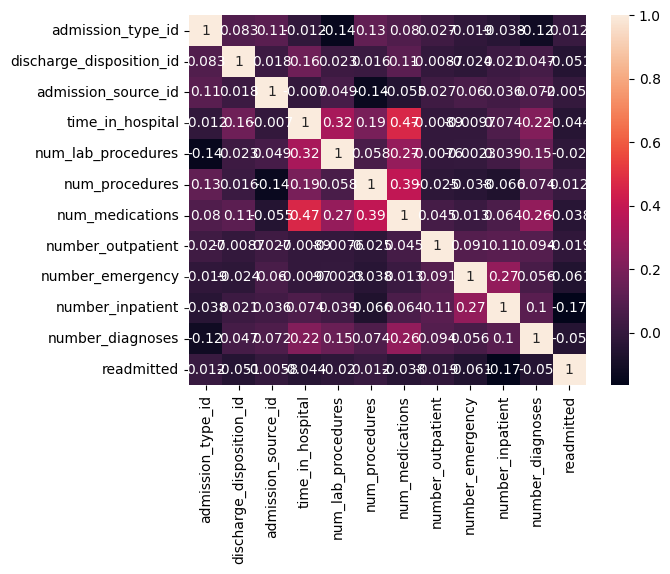

<Figure size 640x480 with 0 Axes>

In [937]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()
plt.savefig('Heatmap.png')

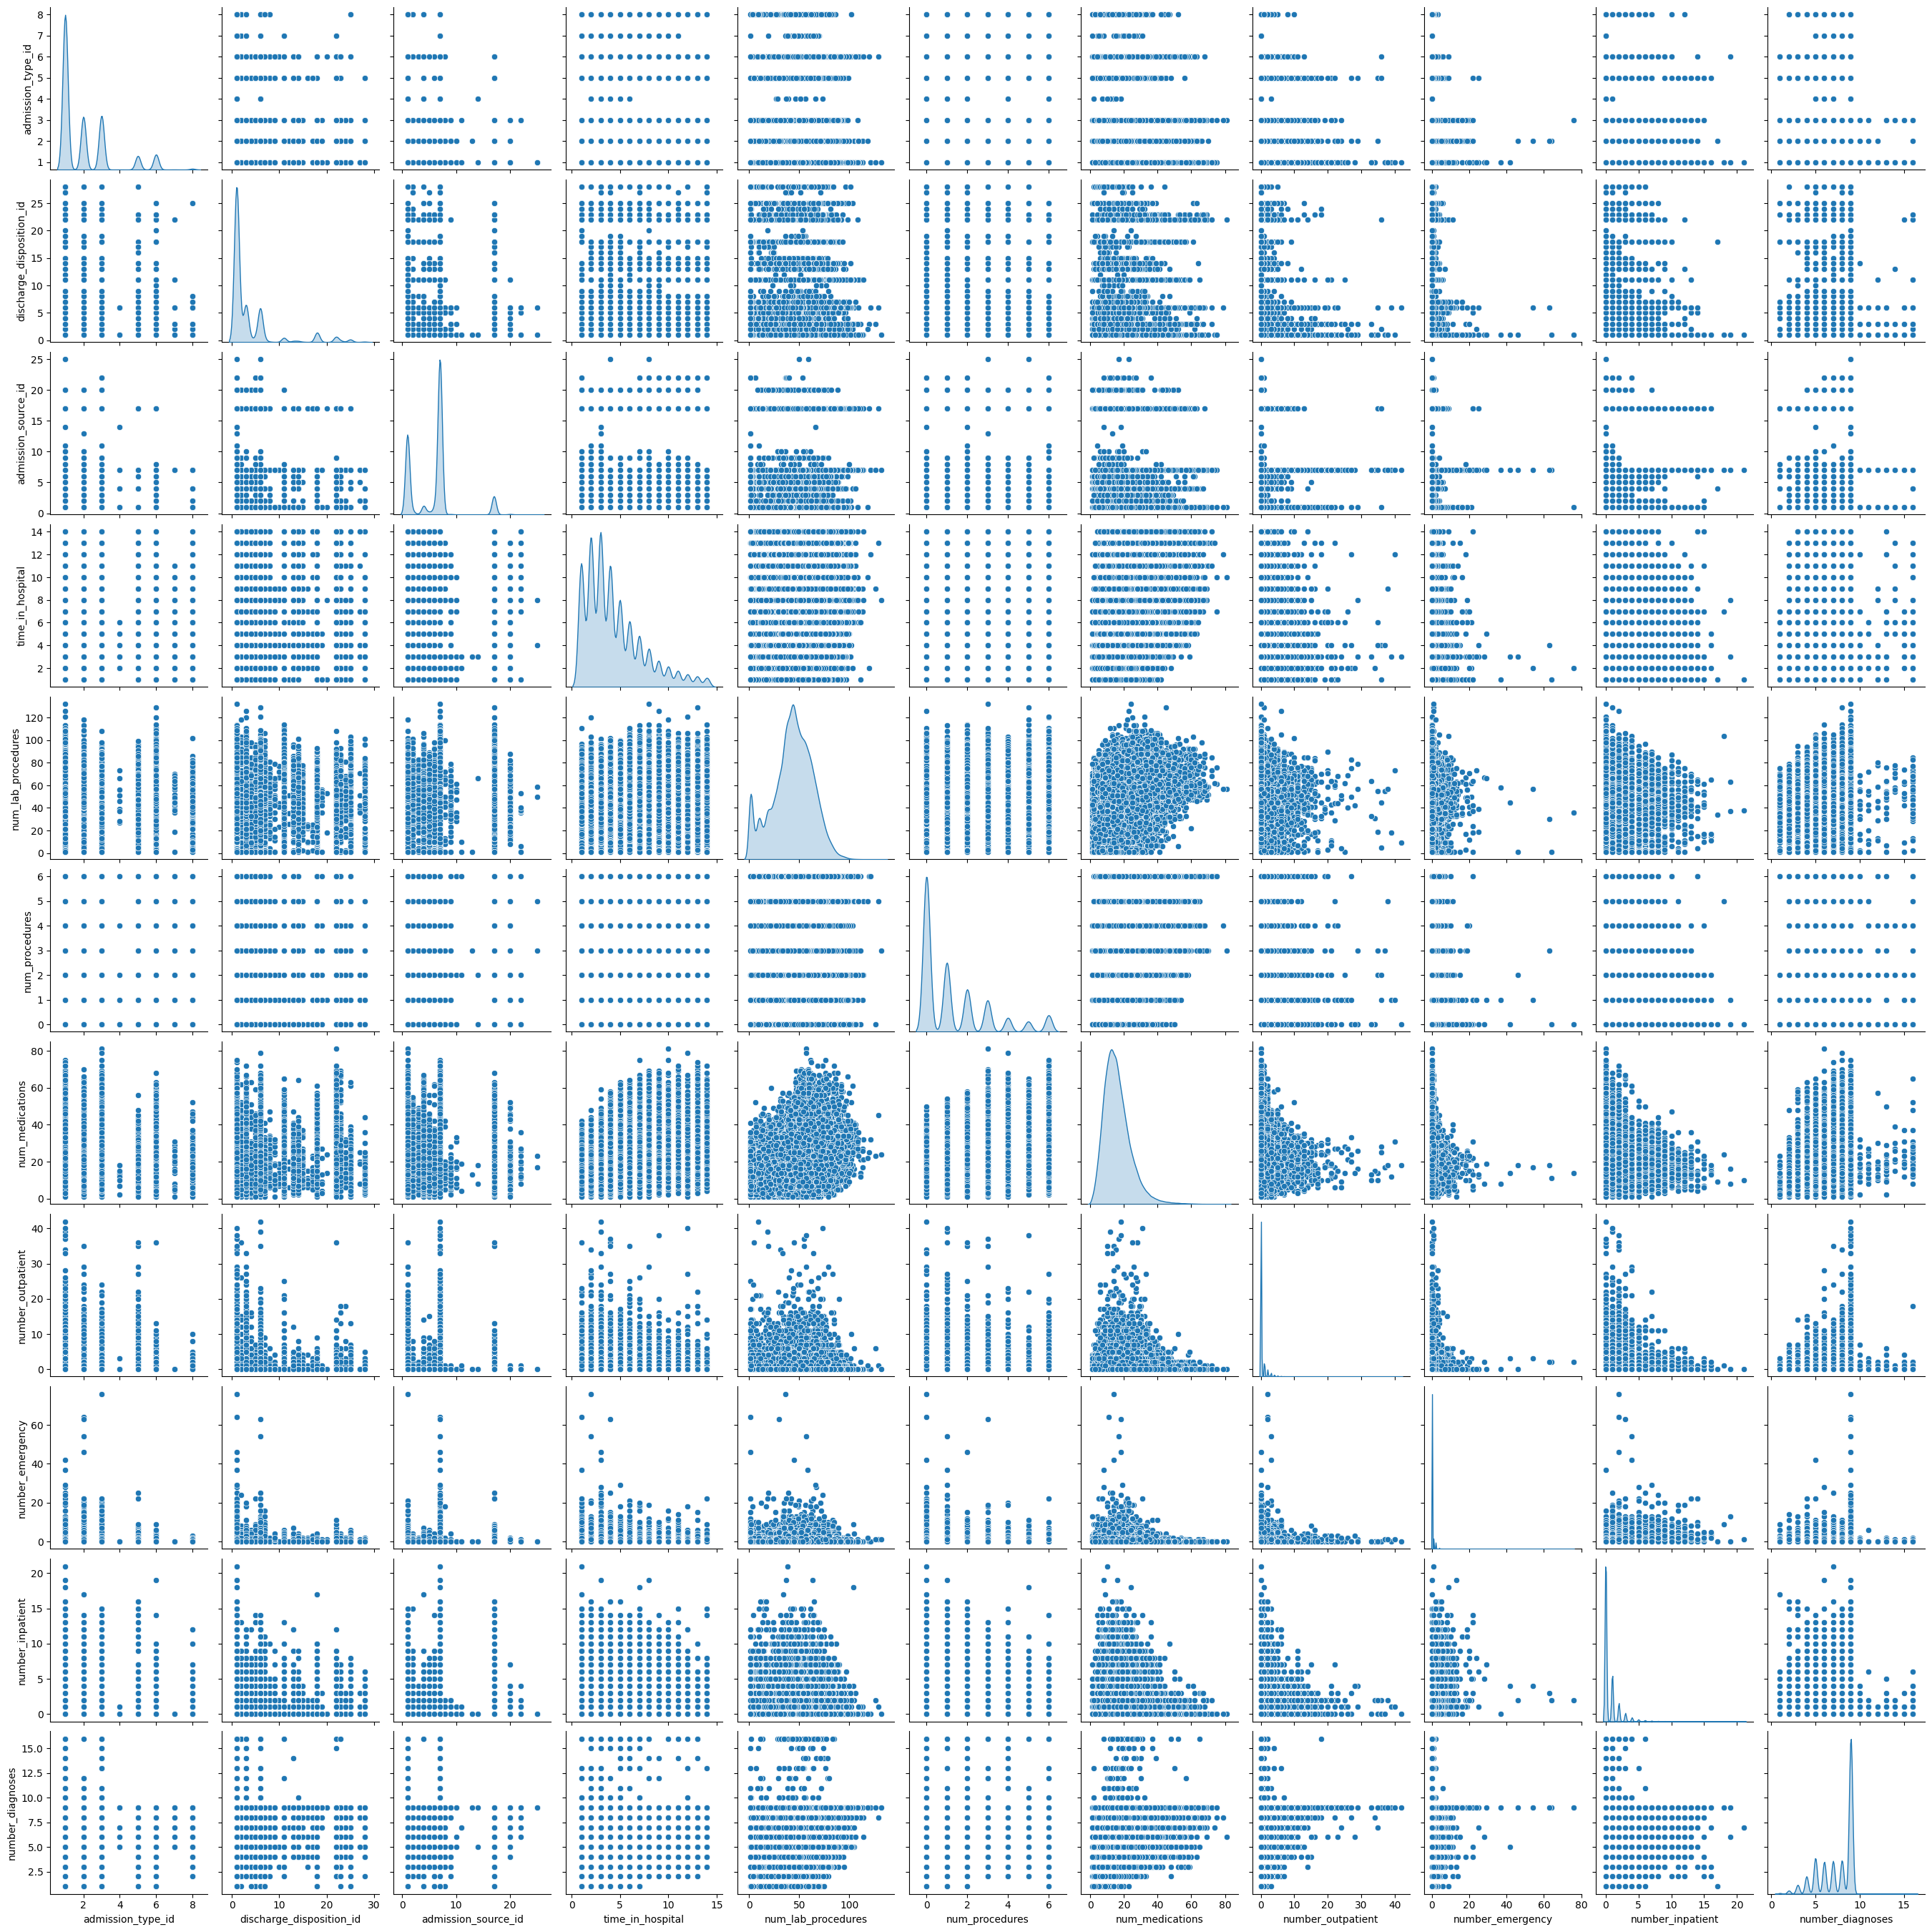

In [837]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Handling Null values which are previously as '?' value

In [894]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [895]:
df.replace('?', pd.NA, inplace=True)

In [896]:
df.isnull().sum()

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol  

In [900]:
df['race'] = df['race'].fillna(df['race'].mode()[0])
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

In [901]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

**Handling Null values completed**

### Encoding:

In [912]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x > 0 else 0).astype(int)

In [913]:
df['readmitted'].value_counts()

readmitted
1    90409
0    11357
Name: count, dtype: int64

#### Dropping columns which has only 1 unique value

In [918]:
df = df.loc[:, df.nunique() > 1]

In [920]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'There are {len(categorical_features)} Categorical Features: {categorical_features}')

There are 30 Categorical Features: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


### Analysis of Categorical Features Relationship with Readmitted

In [938]:
from scipy.stats import chi2_contingency

def run_chi_square_tests(df, categorical_features, target='readmitted'):
    results = []
    for col in categorical_features:
        contingency = pd.crosstab(df[col], df[target])
        stat, p, dof, expected = chi2_contingency(contingency)
        results.append({
            'Feature': col,
            'p-value': p,
            'Significant': 'Yes' if p < 0.05 else 'No'
        })
    return pd.DataFrame(results).sort_values(by='p-value')

chi_square_results = run_chi_square_tests(df, categorical_features)
chi_square_results


,Feature,p-value,Significant
3,diag_1,4.423499e-92,Yes
5,diag_3,1.407228e-52,Yes
22,insulin,3.981889e-41,Yes
4,diag_2,2.142657e-39,Yes
2,age,6.597923e-21,Yes
29,diabetesMed,5.565116e-18,Yes
7,metformin,1.085303e-12,Yes
28,change,5.212417e-10,Yes
6,A1Cresult,1.517602e-04,Yes
8,repaglinide,7.286841e-03,Yes


#### From the above observations, it seems many features are not related with 'Readmission". Dropping the irrelavant features

In [931]:
significant_features = chi_square_results.loc[chi_square_results['Significant']=='Yes', 'Feature'].tolist()

In [935]:
significant_df = df[numerical_features + significant_features]

### Analysis of Numerical features relationship with readmitted

In [940]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 8.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 9.1 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 10.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.8 MB/s eta 0:00:00


In [942]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(significant_df[numerical_features])  # include constant for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
0,const,23.719093
7,num_medications,1.556256
4,time_in_hospital,1.390965
6,num_procedures,1.227085
5,num_lab_procedures,1.179001
11,number_diagnoses,1.138587
10,number_inpatient,1.106151
1,admission_type_id,1.099856
9,number_emergency,1.087008
3,admission_source_id,1.056688


#### From the above observations, it seems there is no high multicollinearity involved in the features.

---------------------------------------------------------------------------------------------------------
### Handing Outliers

In [943]:
significant_df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_3,insulin,diag_2,age,diabetesMed,metformin,change,A1Cresult,repaglinide,glipizide
0,6,25,1,1,41,0,1,0,0,0,...,250,No,276,[0-10),No,No,No,>8,No,No
1,1,1,7,3,59,0,18,0,0,0,...,255,Up,250.01,[10-20),Yes,No,Ch,>8,No,No
2,1,1,7,2,11,5,13,2,0,1,...,V27,No,250,[20-30),Yes,No,No,>8,No,Steady
3,1,1,7,2,44,1,16,0,0,0,...,403,Up,250.43,[30-40),Yes,No,Ch,>8,No,No
4,1,1,7,1,51,0,8,0,0,0,...,250,Steady,157,[40-50),Yes,No,Ch,>8,No,Steady


In [944]:
significant_df = pd.concat([significant_df, df['readmitted']],axis=1)

In [945]:
significant_df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin,diag_2,age,diabetesMed,metformin,change,A1Cresult,repaglinide,glipizide,readmitted
0,6,25,1,1,41,0,1,0,0,0,...,No,276,[0-10),No,No,No,>8,No,No,1
1,1,1,7,3,59,0,18,0,0,0,...,Up,250.01,[10-20),Yes,No,Ch,>8,No,No,1
2,1,1,7,2,11,5,13,2,0,1,...,No,250,[20-30),Yes,No,No,>8,No,Steady,1
3,1,1,7,2,44,1,16,0,0,0,...,Up,250.43,[30-40),Yes,No,Ch,>8,No,No,1
4,1,1,7,1,51,0,8,0,0,0,...,Steady,157,[40-50),Yes,No,Ch,>8,No,Steady,1


In [946]:
significant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   admission_type_id         101766 non-null  int64 
 1   discharge_disposition_id  101766 non-null  int64 
 2   admission_source_id       101766 non-null  int64 
 3   time_in_hospital          101766 non-null  int64 
 4   num_lab_procedures        101766 non-null  int64 
 5   num_procedures            101766 non-null  int64 
 6   num_medications           101766 non-null  int64 
 7   number_outpatient         101766 non-null  int64 
 8   number_emergency          101766 non-null  int64 
 9   number_inpatient          101766 non-null  int64 
 10  number_diagnoses          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_3                    101766 non-null  object
 13  insulin                   101766 non-null  object
 14  diag

In [947]:
significant_df.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'diag_1', 'diag_3', 'insulin',
       'diag_2', 'age', 'diabetesMed', 'metformin', 'change', 'A1Cresult',
       'repaglinide', 'glipizide', 'readmitted'],
      dtype='object')